The Snippet takes the processed subset of single cell gene expression dataset of Arabidopsis thaliana root cells processed by 10x genomics Cell Ranger pipeline (Ryu et al., 2019), and generates the tsne graph to visualise the various clusters that can be found.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv("https://github.com/IvoLeist/ml_cnag-crg_course/raw/main/day4/data/single_cell_dataset.zip",sep="\t",index_col=1, header=0)

In [3]:
df.head(2)

,AT1G01070,HTR12,AT1G01453,ADF10,PLIM2B,SBTI1.1,GL22,GPAT2,AT1G02570,BXL2,...,AT5G66440,AT5G66580,AT5G66590,AT5G66800,AT5G66815,AT5G66860,AT5G66985,IRX14H,PER73,RPL26B
RPP1A,,,,,,,,,,,,,,,,,,,,,
1.40,0.51,-0.26,-0.28,-0.24,-0.14,-0.13,-0.07,-0.29,-0.31,-0.23,...,0.61,-0.55,-0.41,-0.43,2.01,3.01,-0.24,-0.18,-0.34,1.16
1.36,-0.22,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,0.81,...,-0.48,-0.55,-0.41,-0.43,-0.24,0.89,-0.24,-0.18,-0.49,-0.68


In [4]:
df.shape

(4406, 1999)

In [5]:
from sklearn.decomposition import PCA
import pandas as pd

In [6]:
pca_scores = PCA().fit_transform(df)

In [7]:
# create a dataframe of pca_scores
df_pc = pd.DataFrame(pca_scores)

In [8]:
# perform t-SNE on PCs scores
# we will use first 50 PCs but this can vary
from sklearn.manifold import TSNE
tsne_em = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12, n_iter=1000, learning_rate=368, verbose=1).fit_transform(df_pc.loc[:,0:49])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4406 samples in 0.000s...
[t-SNE] Computed neighbors for 4406 samples in 0.548s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4406
[t-SNE] Computed conditional probabilities for sample 2000 / 4406
[t-SNE] Computed conditional probabilities for sample 3000 / 4406
[t-SNE] Computed conditional probabilities for sample 4000 / 4406
[t-SNE] Computed conditional probabilities for sample 4406 / 4406
[t-SNE] Mean sigma: 4.897337
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.967659
[t-SNE] KL divergence after 1000 iterations: 0.828433


In [9]:
tsne_em

array([[  1.1054504,  21.742386 ],
       [ -4.4589896,  34.529438 ],
       [  5.0136185,  -8.737537 ],
       ...,
       [-21.05284  ,  -2.1200464],
       [ 11.014936 ,   1.7652726],
       [-15.06096  ,  -6.9123015]], dtype=float32)

In [10]:
from sklearn.cluster import DBSCAN
# here eps parameter is very important and optimizing eps is essential
# for well defined clusters. I have run DBSCAN with several eps values
# and got good clusters with eps=3
get_clusters = DBSCAN(eps=3, min_samples=10).fit_predict(tsne_em)
# check unique clusters
# -1 value represents noisy points could not assigned to any cluster
set(get_clusters)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [14]:
colorlist=get_clusters
colordot=('#713e5a', '#63a375', '#edc79b', '#d57a66', '#ca6680', '#395B50', '#92AFD7', '#b0413e', '#4381c1', '#736ced', '#631a86', '#de541e', '#022b3a', '#000000')
unique_class = set(colorlist)
assign_values = {col: i for i, col in enumerate(unique_class)}
assign_values

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 -1: 13}

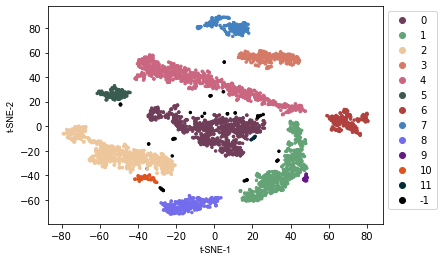

In [13]:
from matplotlib.colors import ListedColormap
plt.subplots(figsize=(6, 4))
colorlist=get_clusters
colordot=('#713e5a', '#63a375', '#edc79b', '#d57a66', '#ca6680', '#395B50', '#92AFD7', '#b0413e', '#4381c1', '#736ced', '#631a86', '#de541e', '#022b3a', '#000000')
unique_class = set(colorlist)
assign_values = {col: i for i, col in enumerate(unique_class)}
color_result_num = [assign_values[i] for i in colorlist]
colour_map = ListedColormap(colordot)
s=plt.scatter(tsne_em[:, 0], tsne_em[:, 1], c=color_result_num, cmap=colour_map,s=6, alpha=1, marker="o")
plt.legend(handles=s.legend_elements()[0], labels=list(unique_class), bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("t-SNE-1", fontsize=9, fontname="Arial")
plt.ylabel("t-SNE-2", fontsize=9, fontname="Arial")
plt.show()